# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Clustering Classification/Dataset_clustering.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah Baris: 9800
Jumlah Kolom: 18
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object
Kolom Numerik: Index(['Row ID', 'Postal Code', 'Sales'], dtype='object')
Kolom Kategorikal: Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country      

<ipython-input-7-88f1918a46c3>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mean(), inplace=True)


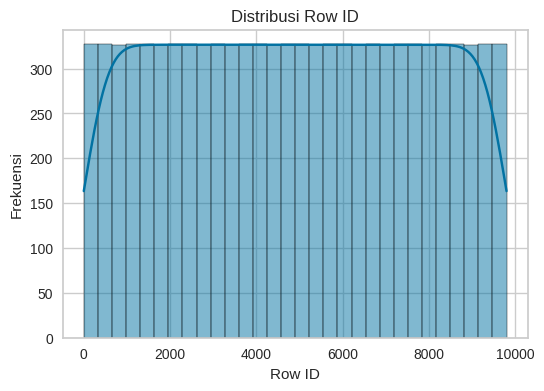

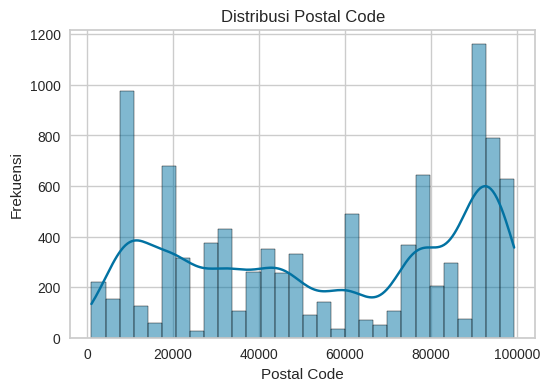

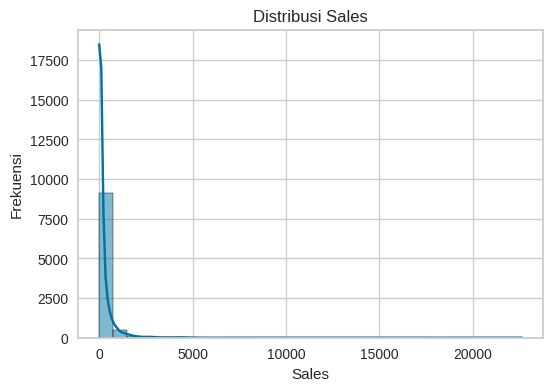

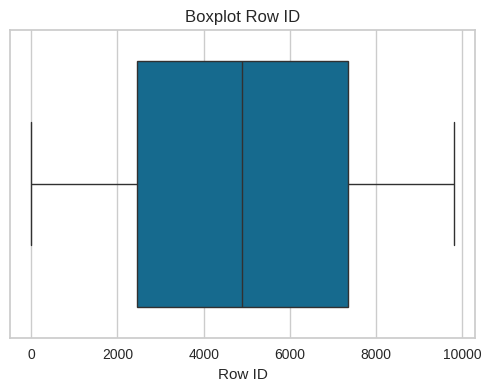

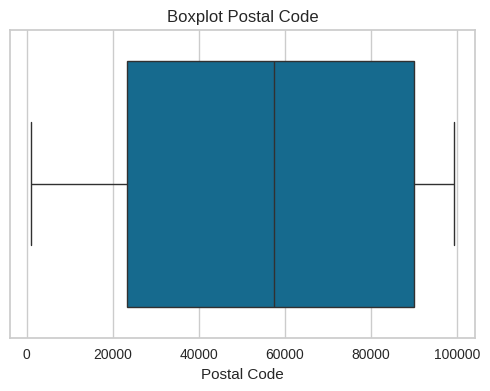

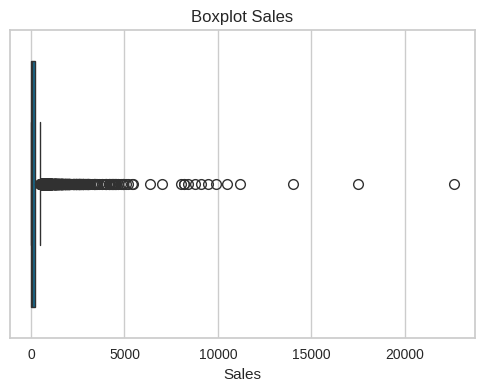

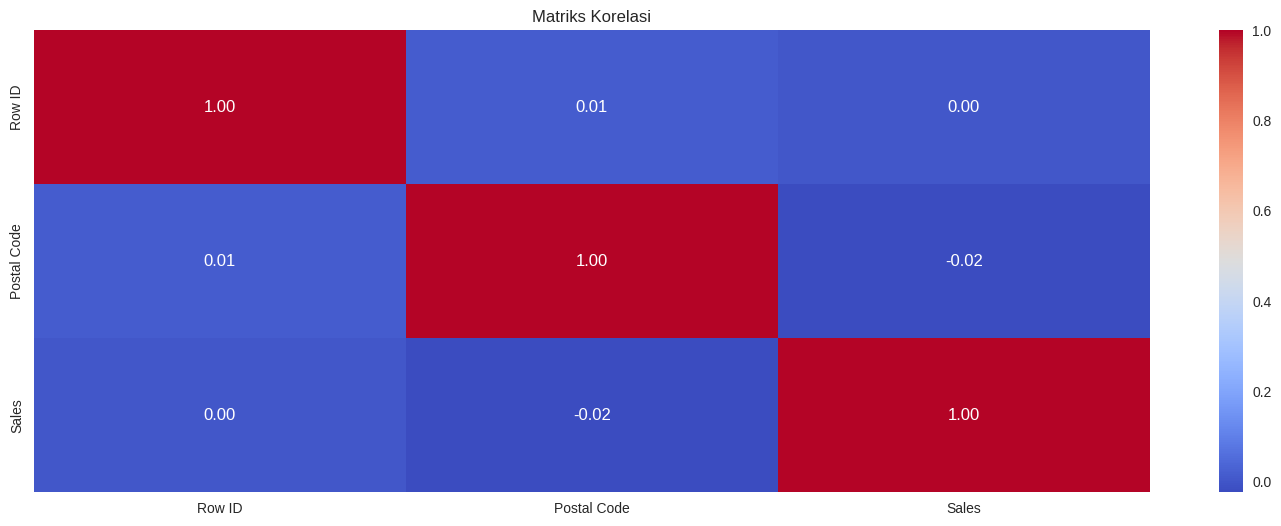

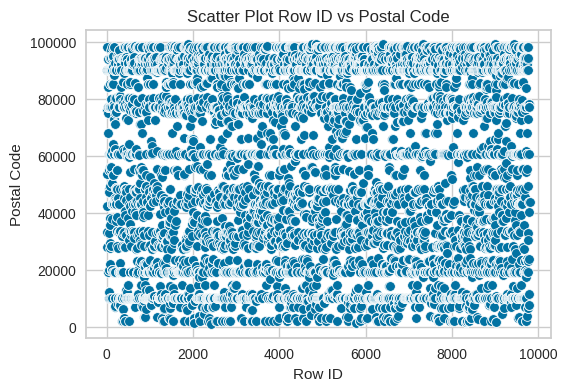

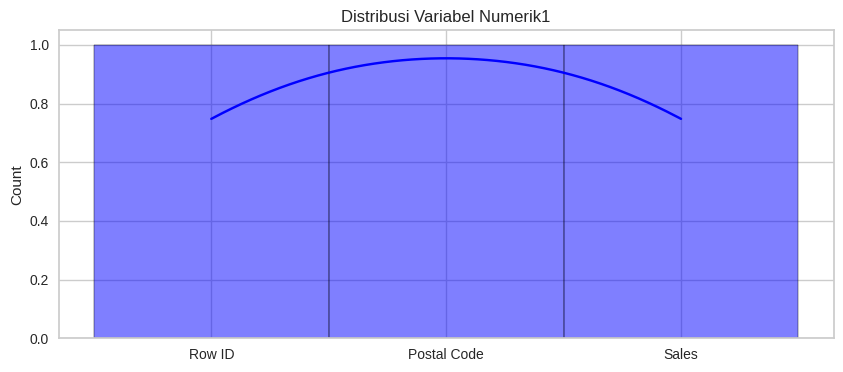

<ipython-input-7-88f1918a46c3>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_columns, palette='pastel')


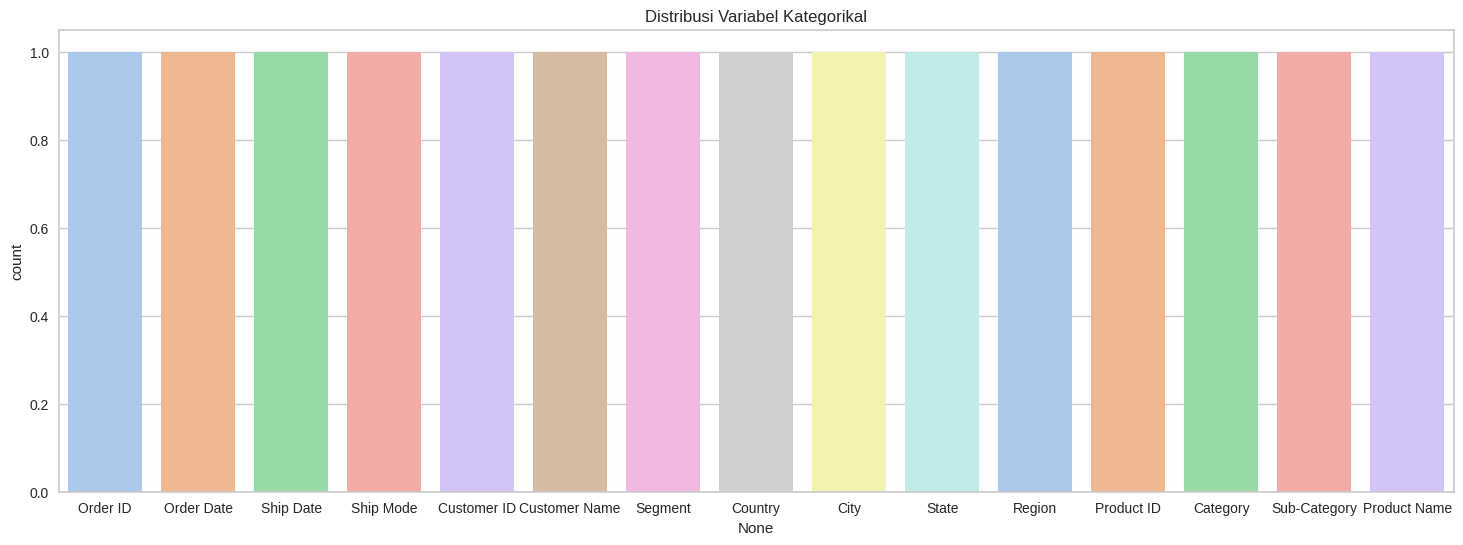

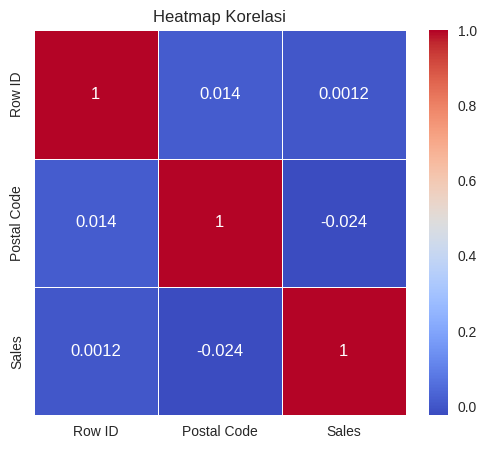

In [7]:
# cek jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

# cek tipe data numerikal dan kategorikal
print(df.dtypes)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom Numerik:", numerical_columns)
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom Kategorikal:", categorical_columns)

# menangani missing value
print(df.isnull().sum())
df['Postal Code'].fillna(df['Postal Code'].mean(), inplace=True)
print(df.isnull().sum())  # harusnya semua nol

# statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe(include='all'))

# histogram visualisasi distribusi
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols[:5]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

for col in numerical_cols[:5]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

# matriks korelasi
plt.figure(figsize=(18, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

# scatter plot antara 2 variabel numerik (ganti dgn kolom yg relevan)
if len(numerical_cols) > 1:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]])
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])
    plt.title(f'Scatter Plot {numerical_cols[0]} vs {numerical_cols[1]}')
    plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(numerical_columns, kde=True, bins=10, color='blue')
plt.title("Distribusi Variabel Numerik1")
plt.show()

# barchart variabel kategorikal
plt.figure(figsize=(18, 6))
sns.countplot(x=categorical_columns, palette='pastel')
plt.title("Distribusi Variabel Kategorikal")
plt.show()


# heatmap Korelasi variabel numerik
plt.figure(figsize=(6,5))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah duplikat sebelum: 0
Jumlah duplikat setelah: 0
  Order Date  Ship Date  Lead Time
0 2017-11-08 2017-11-11          3
2 2017-06-12 2017-06-16          4
4 2016-10-11 2016-10-18          7
5 2015-06-09 2015-06-14          5
6 2015-06-09 2015-06-14          5
Jumlah data setelah outlier handling: 8655 baris
Dataset setelah pembersihan dan transformasi:
   Row ID        Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11          2    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16          2    DV-13045   
4       5  US-2016-108966 2016-10-11 2016-10-18          3    SO-20335   
5       6  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   
6       7  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los An

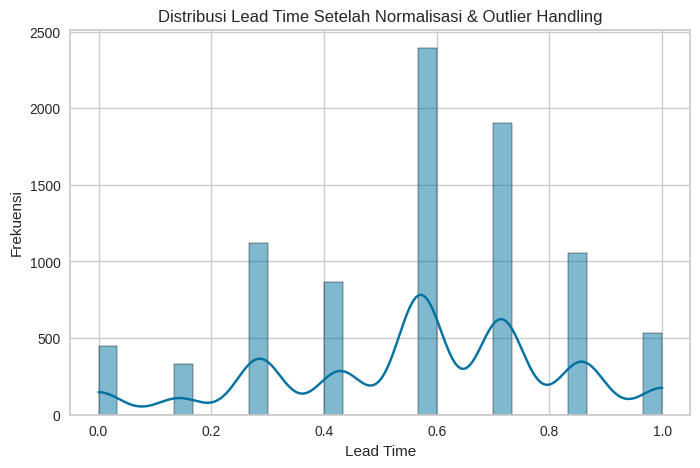

In [35]:
# Penanganan data duplikat
print(f"Jumlah duplikat sebelum: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah duplikat setelah: {df.duplicated().sum()}")

# Pastikan kolom Order Date dan Ship Date dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Hitung Lead Time (selisih dalam hari)
df['Lead Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Cek hasilnya
print(df[['Order Date', 'Ship Date', 'Lead Time']].head())

# Penanganan outlier hanya pada Lead Time
Q1 = df['Lead Time'].quantile(0.25)
Q3 = df['Lead Time'].quantile(0.75)
IQR = Q3 - Q1

# Filter data tanpa outlier
df = df[~((df['Lead Time'] < (Q1 - 1.5 * IQR)) | (df['Lead Time'] > (Q3 + 1.5 * IQR)))]
print(f"Jumlah data setelah outlier handling: {df.shape[0]} baris")

# Label encoding untuk Ship Mode dan Region
categorical_columns = ['Ship Mode', 'Region']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Binning Sales (Low, Medium, High)
df['Sales_Binned'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Medium', 'High'])
df['Sales_Binned'] = label_encoder.fit_transform(df['Sales_Binned'])  # Ubah kategori menjadi angka

# Normalisasi Lead Time
scaler = MinMaxScaler()
df['Lead Time'] = scaler.fit_transform(df[['Lead Time']])

# Statistik
print("Dataset setelah pembersihan dan transformasi:")
print(df.head())

print("\nStatistik deskriptif setelah normalisasi & penanganan outlier:")
print(df.describe())

print(f"\nJumlah data akhir: {df.shape[0]} baris, {df.shape[1]} kolom")

# Plot distribusi Lead Time setelah preprocessing
plt.figure(figsize=(8, 5))
sns.histplot(df['Lead Time'], bins=30, kde=True)
plt.title("Distribusi Lead Time Setelah Normalisasi & Outlier Handling")
plt.xlabel("Lead Time")
plt.ylabel("Frekuensi")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

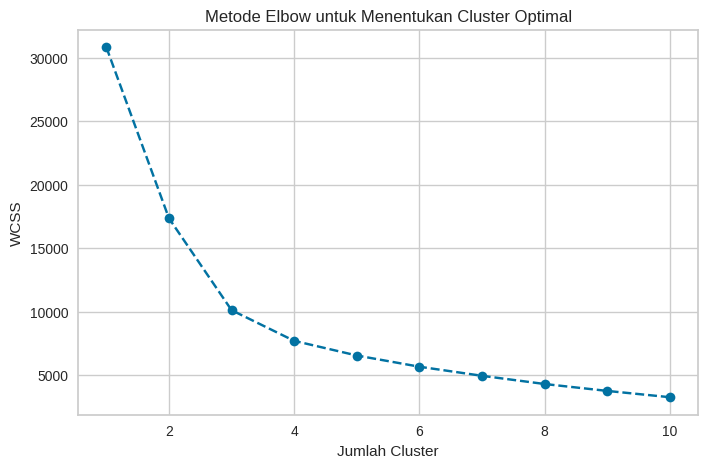


- Grafik ini memvisualisasikan bagaimana nilai WCSS berubah seiring dengan bertambahnya jumlah cluster.
- WCSS mengukur seberapa dekat titik-titik data dalam sebuah cluster dengan pusat cluster tersebut; semakin rendah WCSS, semakin baik.
- Idealnya, kita mencari 'siku' (elbow) pada grafik ini, yaitu titik di mana penambahan jumlah cluster tidak lagi secara signifikan mengurangi WCSS.
- Berdasarkan grafik ini, 'siku' terlihat berada di sekitar jumlah cluster 3 atau 4.
- Ini mengindikasikan bahwa menambahkan cluster setelah titik ini hanya memberikan sedikit peningkatan dalam homogenitas cluster, sehingga 3 atau 4 cluster mungkin merupakan pilihan yang optimal.



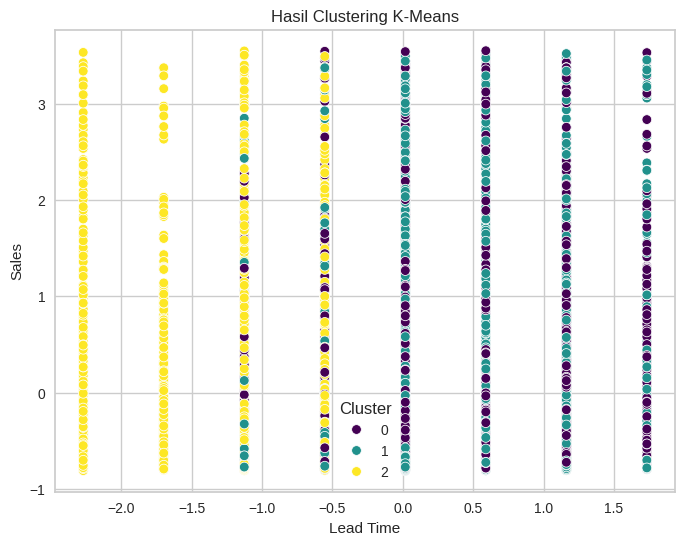

            Sales  Lead Time
Cluster                     
0        0.016534   0.400324
1       -0.019115   0.425215
2        0.005960  -1.316878


In [36]:
# Label Encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Ubah kategori menjadi angka
    label_encoders[col] = le  # Simpan encoder untuk reference

# Standarisasi hanya fitur numerik
scaler = StandardScaler()
df['Lead Time'] = scaler.fit_transform(df[['Lead Time']])  # Standarisasi Lead Time saja

# Pilih fitur yang digunakan untuk clustering
selected_features = ['Lead Time'] + categorical_columns
df_encoded = df[selected_features].copy()

# Elbow Method untuk menentukan jumlah cluster optimal
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Cluster Optimal')
plt.show()

print("""
- Grafik ini memvisualisasikan bagaimana nilai WCSS berubah seiring dengan bertambahnya jumlah cluster.
- WCSS mengukur seberapa dekat titik-titik data dalam sebuah cluster dengan pusat cluster tersebut; semakin rendah WCSS, semakin baik.
- Idealnya, kita mencari 'siku' (elbow) pada grafik ini, yaitu titik di mana penambahan jumlah cluster tidak lagi secara signifikan mengurangi WCSS.
- Berdasarkan grafik ini, 'siku' terlihat berada di sekitar jumlah cluster 3 atau 4.
- Ini mengindikasikan bahwa menambahkan cluster setelah titik ini hanya memberikan sedikit peningkatan dalam homogenitas cluster, sehingga 3 atau 4 cluster mungkin merupakan pilihan yang optimal.
""")

# Clustering dengan jumlah optimal (misalnya 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_encoded)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Lead Time'], y=df['Sales'], hue=df['Cluster'], palette='viridis')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Lead Time')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()

# Menampilkan rata-rata Sales dan Lead Time per Cluster
print(df[['Sales', 'Lead Time', 'Cluster']].groupby('Cluster').mean())

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

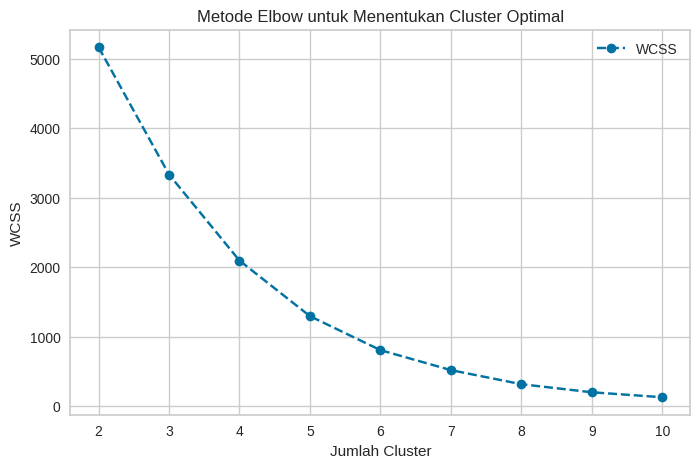

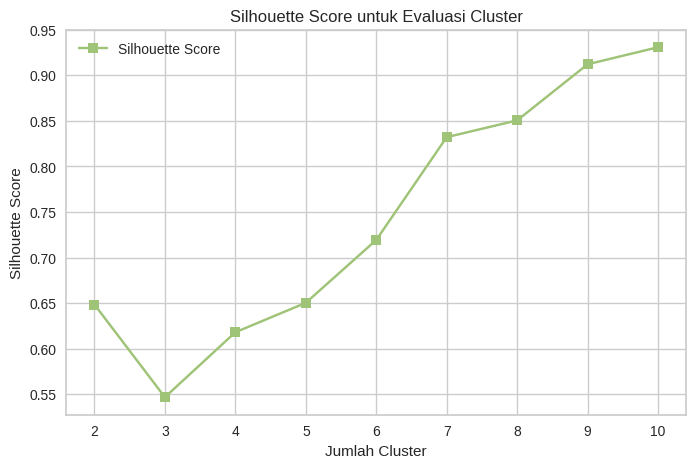

   Clusters         WCSS  Silhouette Score
0         2  5162.676679          0.648487
1         3  3330.721372          0.546780
2         4  2092.268328          0.618103
3         5  1293.067571          0.650388
4         6   804.393281          0.719392
5         7   516.635769          0.832171
6         8   313.853309          0.850595
7         9   197.637931          0.912176
8        10   126.442741          0.930871
Jumlah cluster optimal berdasarkan Silhouette Score: 10
         Lead Time  Ship Mode Encoded
Cluster                              
0        -0.554103                2.0
1         1.162142                3.0
2        -1.349187                0.0
3         0.017702                3.0
4        -2.242530                1.0
5         0.590060                3.0
6         0.325585                2.0
7        -1.127078                2.0
8        -0.553044                0.0
9         1.734224                3.0


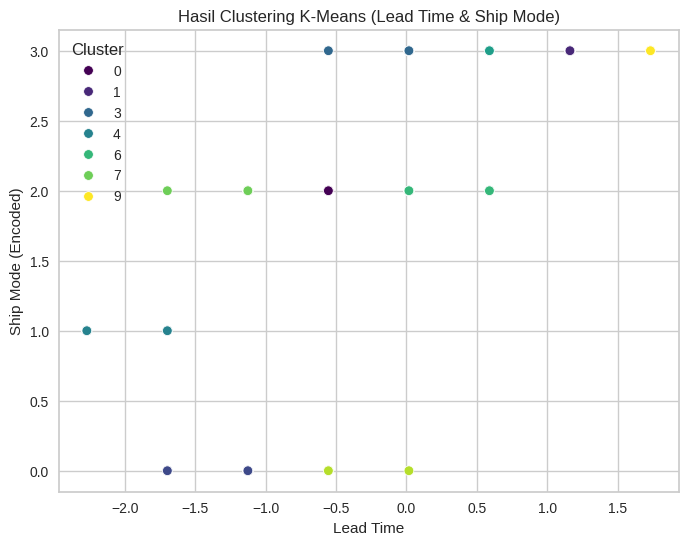

In [38]:
# Pastikan Ship Mode dalam bentuk numerik
if 'Ship Mode' in df.columns:
    le = LabelEncoder()
    df['Ship Mode Encoded'] = le.fit_transform(df['Ship Mode'])  # Encode Ship Mode

# Pastikan hanya fitur yang diperlukan digunakan dalam clustering
numerical_columns = ['Lead Time', 'Ship Mode Encoded']  # Fokus ke Lead Time & Ship Mode
df_clustering = df[numerical_columns].copy()

# Standarisasi data
scaler = StandardScaler()
df_clustering[numerical_columns] = scaler.fit_transform(df_clustering[numerical_columns])

# Menentukan jumlah cluster optimal
wcss = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_clustering)

    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o', linestyle='--', color='b', label="WCSS")
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Cluster Optimal')
plt.legend()
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='s', linestyle='-', color='g', label="Silhouette Score")
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.legend()
plt.show()

# Tampilkan hasil WCSS dan Silhouette Score
df_metrics = pd.DataFrame({'Clusters': list(range_clusters), 'WCSS': wcss, 'Silhouette Score': silhouette_scores})
print(df_metrics)

# Tentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_clusters = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")

# Membangun Model K-Means dengan Cluster Optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_clustering)

# Menampilkan nilai rata-rata tiap cluster
print(df[['Lead Time', 'Ship Mode Encoded', 'Cluster']].groupby('Cluster').mean())

# Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Lead Time'], y=df['Ship Mode Encoded'], hue=df['Cluster'], palette='viridis')
plt.title('Hasil Clustering K-Means (Lead Time & Ship Mode)')
plt.xlabel('Lead Time')
plt.ylabel('Ship Mode (Encoded)')
plt.legend(title='Cluster')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Jumlah baris unik setelah PCA: 54 dari 8655
Terlalu banyak duplikasi setelah PCA, mengurangi jumlah komponen...
Evaluasi Model Sebelum Feature Selection


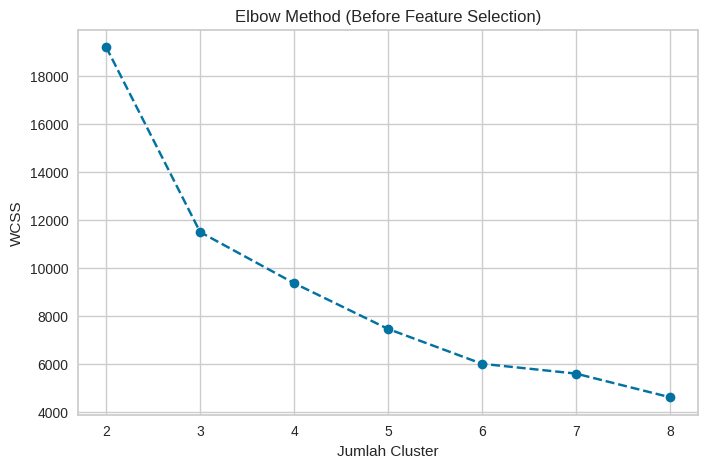

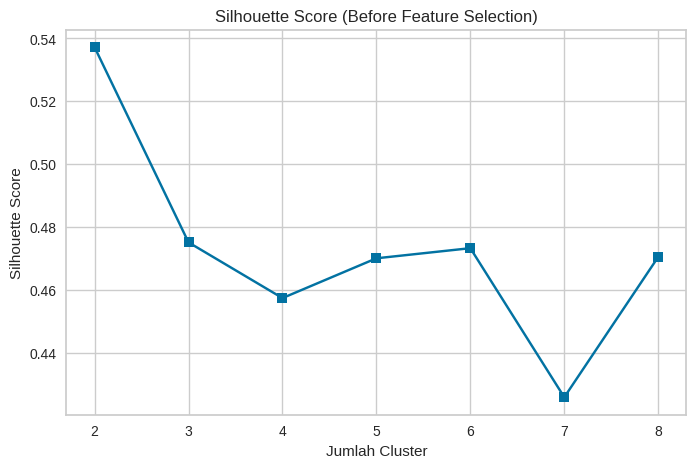

Jumlah cluster optimal berdasarkan Silhouette Score (Before Feature Selection): 2
Evaluasi Model Setelah Feature Selection (PCA)


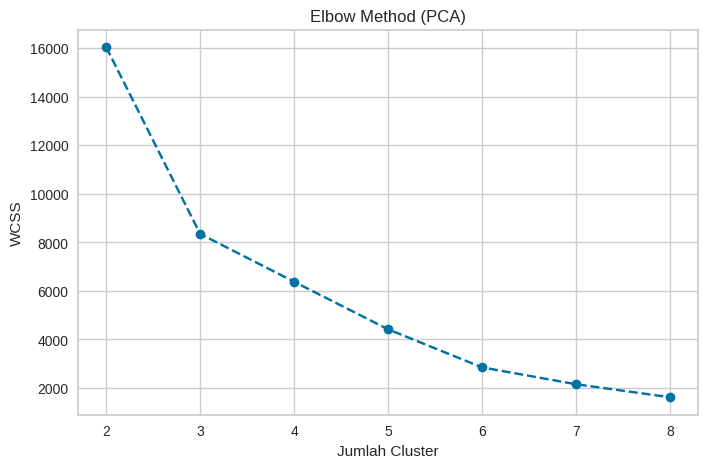

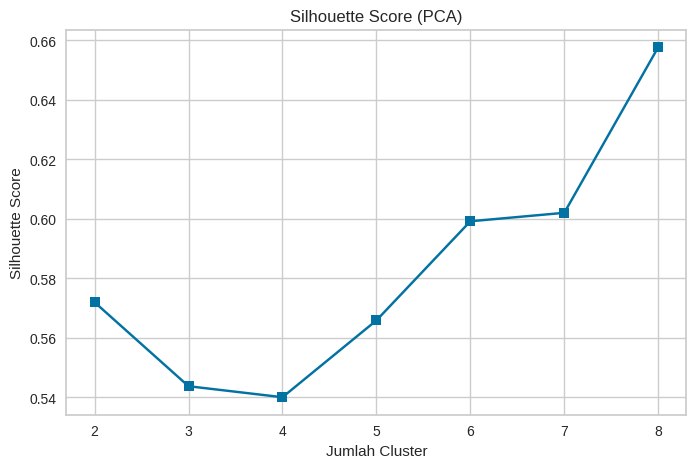

Jumlah cluster optimal berdasarkan Silhouette Score (PCA): 8


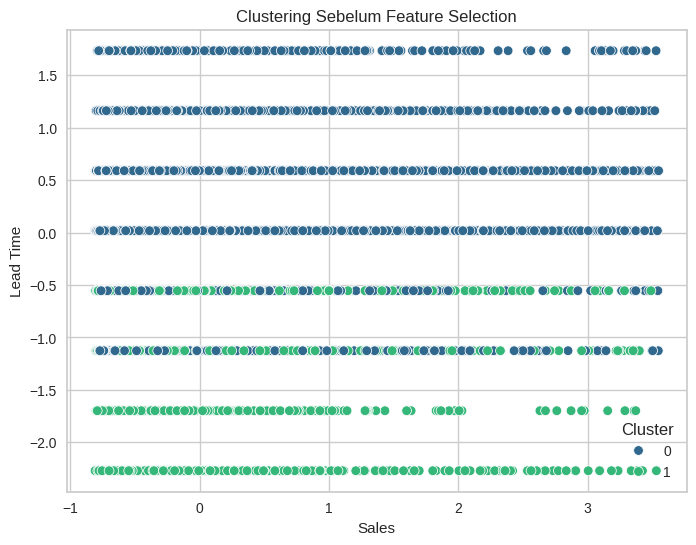

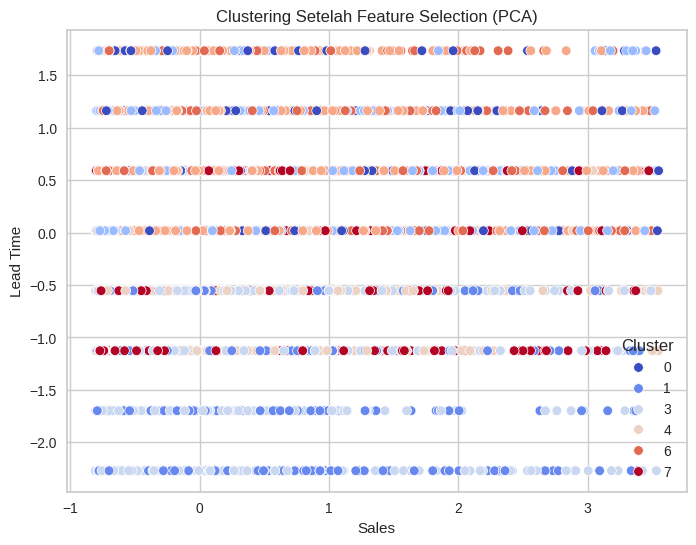

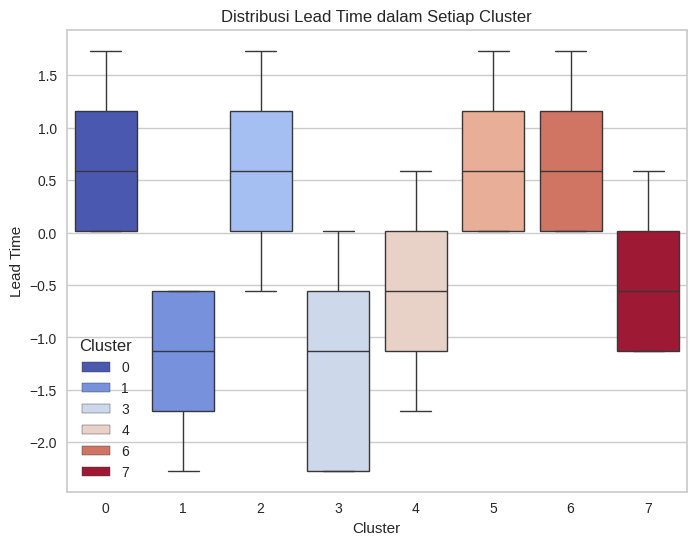

In [42]:
encoder = LabelEncoder()
df_encoded['Ship Mode Encoded'] = encoder.fit_transform(df['Ship Mode'])
# Standarisasi hanya fitur numerik
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Simpan dataset sebelum feature selection
df_clustering_before = df_encoded.copy()

# Variance Threshold untuk menghapus fitur dengan variansi rendah
var_thresh = VarianceThreshold(threshold=0.01)
df_reduced = var_thresh.fit_transform(df_encoded)

# PCA untuk reduksi dimensi (Pilih 3 komponen utama)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_encoded)

# Cek apakah ada terlalu banyak duplikasi setelah PCA
unique_rows = np.unique(df_pca, axis=0)
print(f"Jumlah baris unik setelah PCA: {unique_rows.shape[0]} dari {df_pca.shape[0]}")

# Jika jumlah baris unik jauh lebih kecil dari total data, kurangi komponen PCA
if unique_rows.shape[0] < 0.8 * df_pca.shape[0]:  # Jika lebih dari 20% data duplikat
    print("Terlalu banyak duplikasi setelah PCA, mengurangi jumlah komponen...")
    pca = PCA(n_components=2)  # Kurangi ke 2 komponen utama
    df_pca = pca.fit_transform(df_encoded)

# Tambahkan noise kecil untuk menghindari duplikasi data (jika perlu)
df_pca += np.random.normal(0, 0.01, df_pca.shape)

# Evaluasi model clustering
def evaluate_clustering(df_clustering, method_name):
    wcss = []
    silhouette_scores = []
    range_clusters = range(2, 9)  # Batasi maksimal 8 cluster

    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(df_clustering)

        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df_clustering, cluster_labels))

    # Visualisasi Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, wcss, marker='o', linestyle='--')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('WCSS')
    plt.title(f'Elbow Method ({method_name})')
    plt.show()

    # Visualisasi Silhouette Score
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, silhouette_scores, marker='s', linestyle='-')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score ({method_name})')
    plt.show()

    optimal_clusters = range_clusters[silhouette_scores.index(max(silhouette_scores))]
    print(f'Jumlah cluster optimal berdasarkan Silhouette Score ({method_name}): {optimal_clusters}')
    return optimal_clusters

# Evaluasi sebelum feature selection
print("Evaluasi Model Sebelum Feature Selection")
optimal_before = evaluate_clustering(df_clustering_before, "Before Feature Selection")

# Evaluasi setelah PCA
print("Evaluasi Model Setelah Feature Selection (PCA)")
optimal_pca = evaluate_clustering(df_pca, "PCA")

# Perbandingan hasil clustering
kmeans_before = KMeans(n_clusters=optimal_before, random_state=42, n_init=10)
df['Cluster_Before'] = kmeans_before.fit_predict(df_clustering_before)

kmeans_pca = KMeans(n_clusters=optimal_pca, random_state=42, n_init=10)
df['Cluster_PCA'] = kmeans_pca.fit_predict(df_pca)

# Visualisasi Clustering Sebelum Feature Selection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sales'], y=df['Lead Time'], hue=df['Cluster_Before'], palette='viridis')
plt.title('Clustering Sebelum Feature Selection')
plt.xlabel('Sales')
plt.ylabel('Lead Time')
plt.legend(title='Cluster')
plt.show()

# Visualisasi Clustering Setelah PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sales'], y=df['Lead Time'], hue=df['Cluster_PCA'], palette='coolwarm')
plt.title('Clustering Setelah Feature Selection (PCA)')
plt.xlabel('Sales')
plt.ylabel('Lead Time')
plt.legend(title='Cluster')
plt.show()

# Boxplot untuk melihat distribusi Lead Time dalam masing-masing cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cluster_PCA'], y=df['Lead Time'], hue=df['Cluster_PCA'], palette='coolwarm')
plt.title('Distribusi Lead Time dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Lead Time')
plt.legend(title='Cluster')
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

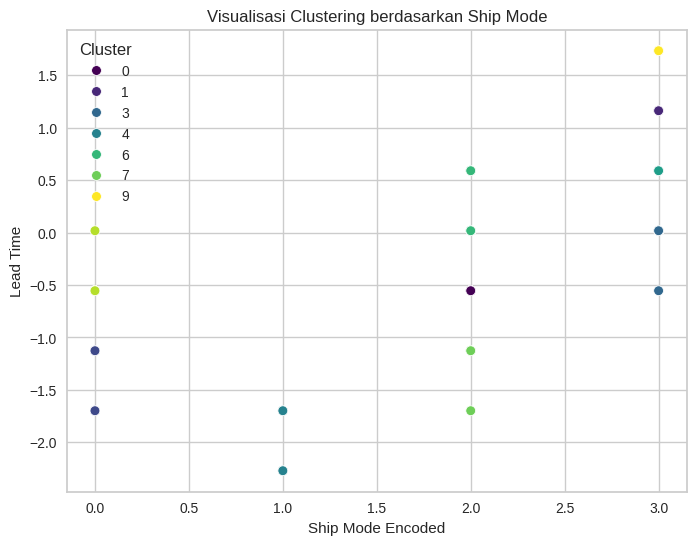

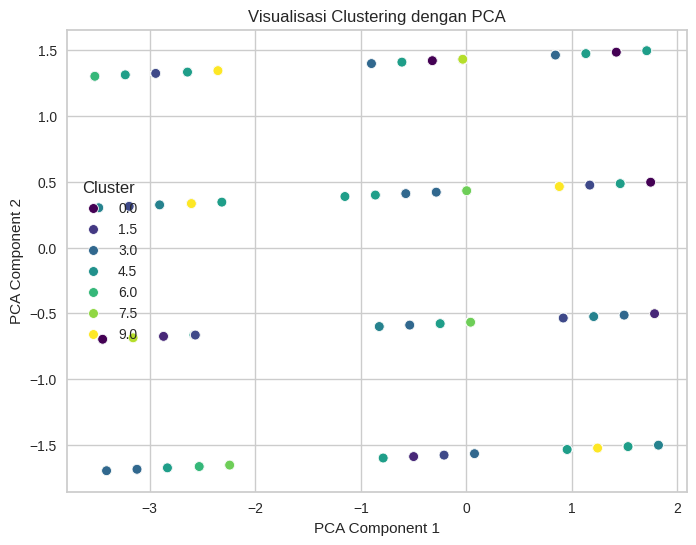

In [47]:
if 'Ship Mode Encoded' not in df.columns:
    print("Error: 'Ship Mode Encoded' tidak ditemukan dalam dataframe. Pastikan sudah diencode.")
else:
    # Visualisasi clustering berdasarkan Ship Mode
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Ship Mode Encoded'], y=df['Lead Time'], hue=df['Cluster'], palette='viridis', s=50)
    plt.title('Visualisasi Clustering berdasarkan Ship Mode')
    plt.xlabel('Ship Mode Encoded')
    plt.ylabel('Lead Time')
    plt.legend(title='Cluster')
    plt.show()

    # Pastikan PCA dilakukan sebelum clustering
    pca = PCA(n_components=2)
    df_pca_transformed = pca.fit_transform(df_encoded)  # Menggunakan df_encoded yang sudah di-scale

    # Ubah hasil PCA menjadi dataframe baru
    df_pca = pd.DataFrame(df_pca_transformed, columns=['PCA1', 'PCA2'])

    # Pastikan jumlah baris sama sebelum menambahkan label cluster
    if len(df_pca) == len(df):
        df_pca['Cluster'] = df['Cluster']
    else:
        print("Warning: Jumlah baris df_pca tidak sesuai dengan df. Pastikan transformasi PCA dilakukan dengan dataset yang sama.")

    # Scatter plot hasil PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df_pca['Cluster'], palette='viridis', s=50)
    plt.title('Visualisasi Clustering dengan PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [25]:
df_encoded['Cluster'] = kmeans.labels_
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# inverse transform kolom kategorikal
for col in categorical_columns:
    df_encoded[col] = label_encoders[col].inverse_transform(df_encoded[col])


df_original = df.copy()
df_original[categorical_columns] = df_encoded[categorical_columns]
df_original['Cluster'] = df_encoded['Cluster']

print(df_original.head())

   Row ID        Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11          2    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16          2    DV-13045   
4       5  US-2016-108966 2016-10-11 2016-10-18          3    SO-20335   
5       6  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   
6       7  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
5  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
6  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

        Product ID         Category  Sub-Category  \
0  FUR-BO-10001798        Furniture     Bookcases   
2  OFF-LA-10000240  Office S

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [48]:
numerical_columns = ['Ship Mode', 'Lead Time']
scaler = StandardScaler()

df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


df_normalized[numerical_columns] = scaler.inverse_transform(df_normalized[numerical_columns])
print(df_normalized.head())

   Row ID        Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11        2.0    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16        2.0    DV-13045   
4       5  US-2016-108966 2016-10-11 2016-10-18        3.0    SO-20335   
5       6  CA-2015-115812 2015-06-09 2015-06-14        3.0    BH-11710   
6       7  CA-2015-115812 2015-06-09 2015-06-14        3.0    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
5  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
6  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
2  Office Supplies        Labels   
4  Office Supplies       S

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [50]:
df_clustered = df.copy()
df_clustered['Cluster'] = kmeans.labels_

# Memilih hanya kolom numerik
df_numeric = df_clustered.select_dtypes(include=[np.number])

# Menghapus kolom yang seluruhnya NaN (jika ada)
df_numeric = df_numeric.dropna(axis=1, how='all')

# Menghitung statistik untuk setiap cluster
cluster_summary = df_numeric.groupby('Cluster').agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).sort_index()

# Format tampilan agar lebih rapi
pd.set_option("display.float_format", "{:.2f}".format)
print(cluster_summary)

        Row ID                                    Ship Mode                   \
         count    mean  median     std  min   max     count mean median  std   
Cluster                                                                        
0          328 5146.12 5388.50 2765.74    1  9736       328 2.00   2.00 0.00   
1         1056 4693.23 4701.50 2681.81   54  9772      1056 3.00   3.00 0.00   
2          785 4745.64 4693.00 2980.32   37  9753       785 0.00   0.00 0.00   
3         2068 5022.03 5097.50 2890.69   15  9786      2068 3.00   3.00 0.00   
4          473 5157.12 5130.00 2652.37  367  9787       473 1.00   1.00 0.00   
5         1527 4957.19 4788.00 2752.88    6  9800      1527 3.00   3.00 0.00   
6          703 4823.74 4722.00 2900.02    3  9697       703 2.00   2.00 0.00   
7          640 4827.85 4587.00 2946.26   18  9795       640 2.00   2.00 0.00   
8          540 4761.42 5090.50 2830.96   80  9726       540 0.00   0.00 0.00   
9          535 5111.91 5539.00 2799.45  

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster Berdasarkan Ship Mode dan Lead Time

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan Ship Mode dan Lead Time.

## Cluster 0:
- **Rata-rata Row ID**: 5146.12  
- **Ship Mode Dominan**: 2.0 (Second Class)  
- **Lead Time (Cluster_PCA Mean)**: 4.00  
- **Analisis**:  
  Cluster ini terdiri dari pelanggan yang lebih sering menggunakan pengiriman dengan Second Class. Lead time relatif lebih tinggi dibandingkan beberapa cluster lainnya, yang menunjukkan bahwa pelanggan dalam kelompok ini cenderung menerima barang dengan waktu pengiriman yang sedang hingga lebih lama.

## Cluster 1:
- **Rata-rata Row ID**: 4693.23  
- **Ship Mode Dominan**: 3.0 (Standard Class)  
- **Lead Time (Cluster_PCA Mean)**: 5.00  
- **Analisis**:  
  Cluster ini didominasi oleh pelanggan yang lebih sering menggunakan Standard Class. Lead time cukup tinggi, menunjukkan bahwa pelanggan dalam kelompok ini cenderung menerima barang dengan waktu pengiriman yang standar.

## Cluster 2:
- **Rata-rata Row ID**: 4745.64  
- **Ship Mode Dominan**: 0.0 (Same Day)  
- **Lead Time (Cluster_PCA Mean)**: 1.00  
- **Analisis**:  
  Cluster ini terdiri dari pelanggan yang cenderung memilih Same Day Delivery. Dengan lead time yang sangat rendah, pelanggan dalam kelompok ini membutuhkan pengiriman cepat dan memiliki kebutuhan mendesak terhadap barang yang mereka beli.

## Cluster 3:
- **Rata-rata Row ID**: 5022.03  
- **Ship Mode Dominan**: 3.0 (Standard Class)  
- **Lead Time (Cluster_PCA Mean)**: 5.00  
- **Analisis**:  
  Cluster ini serupa dengan Cluster 1, di mana pelanggan lebih sering menggunakan Standard Class. Lead time tetap tinggi, yang menunjukkan pola pemesanan yang stabil dalam kelompok ini.

## Cluster 4:
- **Rata-rata Row ID**: 5157.12  
- **Ship Mode Dominan**: 1.0 (First Class)  
- **Lead Time (Cluster_PCA Mean)**: 1.00  
- **Analisis**:  
  Cluster ini mencerminkan pelanggan yang lebih memilih First Class untuk mendapatkan pengiriman yang lebih cepat dibandingkan Standard atau Second Class. Lead time yang rendah menunjukkan pelanggan di kelompok ini mengutamakan kecepatan pengiriman.

## Cluster 5:
- **Rata-rata Row ID**: 4957.19  
- **Ship Mode Dominan**: 3.0 (Standard Class)  
- **Lead Time (Cluster_PCA Mean)**: 5.00  
- **Analisis**:  
  Seperti Cluster 1 dan Cluster 3, pelanggan di sini juga cenderung memilih Standard Class. Pola lead time yang mirip menunjukkan adanya kelompok pelanggan yang memiliki ekspektasi waktu pengiriman yang lebih lama.

## Cluster 6:
- **Rata-rata Row ID**: 4823.74  
- **Ship Mode Dominan**: 2.0 (Second Class)  
- **Lead Time (Cluster_PCA Mean)**: 7.00  
- **Analisis**:  
  Cluster ini memiliki pelanggan yang lebih sering menggunakan Second Class tetapi dengan lead time yang lebih tinggi dibandingkan cluster lain. Hal ini menunjukkan bahwa pelanggan dalam kelompok ini lebih fleksibel terhadap waktu pengiriman.

## Cluster 7:
- **Rata-rata Row ID**: 4827.85  
- **Ship Mode Dominan**: 2.0 (Second Class)  
- **Lead Time (Cluster_PCA Mean)**: 5.50  
- **Analisis**:  
  Mirip dengan Cluster 6, pelanggan di sini juga lebih sering memilih Second Class. Namun, lead time sedikit lebih rendah, menunjukkan bahwa pelanggan dalam kelompok ini mungkin memiliki ekspektasi pengiriman yang lebih cepat dibandingkan Cluster 6.

## Cluster 8:
- **Rata-rata Row ID**: 4761.42  
- **Ship Mode Dominan**: 0.0 (Same Day)  
- **Lead Time (Cluster_PCA Mean)**: 3.00  
- **Analisis**:  
  Cluster ini menunjukkan pelanggan yang lebih sering memilih Same Day Delivery, tetapi dengan lead time yang sedikit lebih tinggi dari Cluster 2. Ini mungkin menunjukkan variasi dalam tingkat ketersediaan produk atau lokasi pengiriman.

## Cluster 9:
- **Rata-rata Row ID**: 5111.91  
- **Ship Mode Dominan**: 3.0 (Standard Class)  
- **Lead Time (Cluster_PCA Mean)**: 5.00  
- **Analisis**:  
  Cluster ini memiliki karakteristik mirip dengan Cluster 1, Cluster 3, dan Cluster 5, dengan mayoritas pelanggan memilih Standard Class dan lead time yang lebih tinggi. Ini bisa mencerminkan pelanggan yang tidak memiliki kebutuhan mendesak terhadap barang yang mereka beli.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [51]:
df.to_csv("/content/drive/MyDrive/Clustering Classification/hasil_cluster.csv", index=False)
df.to_csv("hasil_cluster.csv", index=False)

from google.colab import files
files.download("hasil_cluster.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>